# Downloading Data & Importing Libraries

Connecting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Modules

In [ ]:
!pip install -q SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 10.8 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import copy
import numpy as np
import pandas as pd
from glob import glob
import zipfile
from tqdm.auto import tqdm
import SimpleITK as stk
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.cluster import KMeans
from skimage import measure
import random


In [ ]:
!wget -O annotations.csv https://zenodo.org/records/3723295/files/annotations.csv?download=1

--2023-12-19 04:21:24--  https://zenodo.org/records/3723295/files/annotations.csv?download=1
Resolving zenodo.org (zenodo.org)... 188.185.79.172, 188.184.98.238, 188.184.103.159, ...
Connecting to zenodo.org (zenodo.org)|188.185.79.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136986 (134K) [text/plain]
Saving to: ‘annotations.csv’

annotations.csv     100%[===================>] 133.78K   411KB/s    in 0.3s    

2023-12-19 04:21:25 (411 KB/s) - ‘annotations.csv’ saved [136986/136986]



In [ ]:
annotations_df = pd.read_csv("/content/candidates.csv")
annotations_df

,seriesuid,coordX,coordY,coordZ,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-56.08,-67.85,-311.92,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,53.21,-244.41,-245.17,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.66,-121.80,-286.62,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-33.66,-72.75,-308.41,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-32.25,-85.36,-362.51,0
...,...,...,...,...,...
551060,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-55.66,37.24,-110.42,0
551061,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,68.40,70.18,-109.72,0
551062,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-82.29,-27.94,-106.92,0
551063,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,38.26,83.50,-102.71,0


<Axes: xlabel='class'>

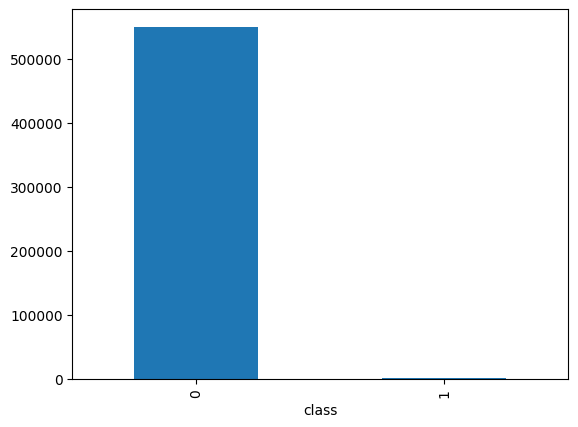

In [ ]:
annotations_df.groupby('class').size().plot(kind='bar')

In [ ]:
annotations_df['class'].value_counts()

In [ ]:
!wget -O candidates.csv https://zenodo.org/records/2604219/files/candidates.csv?download=1

--2023-12-20 10:37:36--  https://zenodo.org/records/2604219/files/candidates.csv?download=1
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.184.103.159, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55427881 (53M) [text/plain]
Saving to: ‘candidates.csv’

candidates.csv      100%[===================>]  52.86M  1.66MB/s    in 78s     

2023-12-20 10:38:55 (696 KB/s) - ‘candidates.csv’ saved [55427881/55427881]



In [ ]:
!wget -O subset0.zip https://zenodo.org/records/3723295/files/subset0.zip?download=1

--2023-12-20 05:21:09--  https://zenodo.org/records/3723295/files/subset0.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.184.103.159, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6811924508 (6.3G) [application/octet-stream]
Saving to: ‘subset0.zip’

subset0.zip         100%[===================>]   6.34G  29.3MB/s    in 3m 46s  

2023-12-20 05:24:55 (28.8 MB/s) - ‘subset0.zip’ saved [6811924508/6811924508]



In [ ]:
!wget -O subset1.zip https://zenodo.org/records/3723295/files/subset1.zip?download=1

--2023-12-20 05:24:55--  https://zenodo.org/records/3723295/files/subset1.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.185.79.172, 188.184.103.159, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6334778552 (5.9G) [application/octet-stream]
Saving to: ‘subset1.zip’

subset1.zip         100%[===================>]   5.90G  29.1MB/s    in 3m 32s  

2023-12-20 05:28:28 (28.5 MB/s) - ‘subset1.zip’ saved [6334778552/6334778552]



In [ ]:
!wget -O subset2.zip https://zenodo.org/records/3723295/files/subset2.zip?download=1

--2023-12-20 06:13:16--  https://zenodo.org/records/3723295/files/subset2.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.79.172, 188.184.103.159, 188.184.98.238, ...
Connecting to zenodo.org (zenodo.org)|188.185.79.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7257937108 (6.8G) [application/octet-stream]
Saving to: ‘subset2.zip’

subset2.zip         100%[===================>]   6.76G  29.5MB/s    in 4m 1s   

2023-12-20 06:17:17 (28.7 MB/s) - ‘subset2.zip’ saved [7257937108/7257937108]



In [ ]:
!wget -O subset3.zip https://zenodo.org/records/3723295/files/subset3.zip?download=1

--2023-12-20 06:47:41--  https://zenodo.org/records/3723295/files/subset3.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.185.79.172, 188.184.103.159, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6896620114 (6.4G) [application/octet-stream]
Saving to: ‘subset3.zip’

subset3.zip         100%[===================>]   6.42G  29.4MB/s    in 3m 46s  

2023-12-20 06:51:28 (29.1 MB/s) - ‘subset3.zip’ saved [6896620114/6896620114]



In [ ]:
!wget -O subset4.zip https://zenodo.org/records/3723295/files/subset4.zip?download=1

--2023-12-20 07:03:18--  https://zenodo.org/records/3723295/files/subset4.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.185.79.172, 188.184.103.159, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6856144330 (6.4G) [application/octet-stream]
Saving to: ‘subset4.zip’

subset4.zip         100%[===================>]   6.38G  29.4MB/s    in 3m 48s  

2023-12-20 07:07:06 (28.7 MB/s) - ‘subset4.zip’ saved [6856144330/6856144330]



In [ ]:
!wget -O subset5.zip https://zenodo.org/records/3723295/files/subset5.zip?download=1

--2023-12-20 07:07:19--  https://zenodo.org/records/3723295/files/subset5.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.79.172, 188.184.103.159, 188.184.98.238, ...
Connecting to zenodo.org (zenodo.org)|188.185.79.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6610460097 (6.2G) [application/octet-stream]
Saving to: ‘subset5.zip’

subset5.zip         100%[===================>]   6.16G  29.4MB/s    in 3m 39s  

2023-12-20 07:10:58 (28.8 MB/s) - ‘subset5.zip’ saved [6610460097/6610460097]



In [ ]:
!wget -O subset6.zip https://zenodo.org/records/3723295/files/subset6.zip?download=1

--2023-12-20 07:31:51--  https://zenodo.org/records/3723295/files/subset6.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.79.172, 188.184.98.238, 188.184.103.159, ...
Connecting to zenodo.org (zenodo.org)|188.185.79.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6531050274 (6.1G) [application/octet-stream]
Saving to: ‘subset6.zip’

subset6.zip         100%[===================>]   6.08G  29.0MB/s    in 3m 37s  

2023-12-20 07:35:29 (28.7 MB/s) - ‘subset6.zip’ saved [6531050274/6531050274]



In [ ]:
!wget -O subset7.zip https://zenodo.org/records/4121926/files/subset7.zip?download=1

--2023-12-20 07:37:21--  https://zenodo.org/records/4121926/files/subset7.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.184.98.238, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6313598213 (5.9G) [application/octet-stream]
Saving to: ‘subset7.zip’

subset7.zip         100%[===================>]   5.88G  29.3MB/s    in 5m 35s  

2023-12-20 07:42:57 (18.0 MB/s) - ‘subset7.zip’ saved [6313598213/6313598213]



In [ ]:
!wget -O subset8.zip https://zenodo.org/records/4121926/files/subset8.zip?download=1

--2023-12-20 08:05:33--  https://zenodo.org/records/4121926/files/subset8.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.185.79.172, 188.184.98.238, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6025767505 (5.6G) [application/octet-stream]
Saving to: ‘subset8.zip’

subset8.zip          63%[===========>        ]   3.54G   774KB/s    in 4m 25s  

2023-12-20 08:09:59 (13.7 MB/s) - Connection closed at byte 3806522745. Retrying.

--2023-12-20 08:10:00--  (try: 2)  https://zenodo.org/records/4121926/files/subset8.zip?download=1
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 6025767505 (5.6G), 2219244760 (2.1G) remaining [application/octet-stream]
Saving to: ‘subset8.zip’

subset8.zip         100%[++++++++++++=======>]   5.61G  29.1MB/s    in 74s     

2023-12-20 08:11:14 (28.7 MB/s) - ‘su

In [ ]:
!wget -O subset9.zip https://zenodo.org/records/4121926/files/subset9.zip?download=1

--2023-12-20 08:11:14--  https://zenodo.org/records/4121926/files/subset9.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.184.98.238, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6699650017 (6.2G) [application/octet-stream]
Saving to: ‘subset9.zip’

subset9.zip         100%[===================>]   6.24G  29.4MB/s    in 4m 49s  

2023-12-20 08:16:04 (22.1 MB/s) - ‘subset9.zip’ saved [6699650017/6699650017]



In [ ]:
!mkdir "/content/ProcessedData/"
!mkdir "/content/DATA"

In [ ]:
!mv /content/annotations.csv /content/DATA/
!mv /content/candidates.csv /content/DATA/

In [ ]:

zip_file_path = "/content/subset9.zip"
extract_folder = "/content/DATA"

os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    file_list = zip_ref.namelist()
    total_files = len(file_list)

with tqdm(total=total_files, desc="Extracting", unit="file") as pbar:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for file in file_list:
            zip_ref.extract(file, extract_folder)
            pbar.update(1)

print(f"Successfully extracted contents to: {extract_folder}")


Extracting:   0%|          | 0/176 [00:00<?, ?file/s]

Successfully extracted contents to: /content/DATA


Paths for Source & Destination of Data

In [ ]:
root = "/content/DATA/"
target_root = "/content/ProcessedData/"

Reading Subsets of Training Data & annotations.csv

In [ ]:
subset = 9
file_list = glob(root+f"subset{subset}/*.mhd")
annotations_df = pd.read_csv(root+"annotations.csv")
print("Files Count:",len(file_list))
print("DF Count:",len(annotations_df))
annotations_df.head()

Files Count: 88
DF Count: 1186


,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150


Distribution of nodules size (diameter)

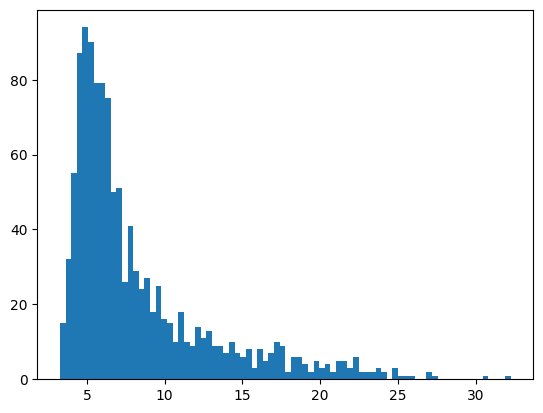

In [ ]:
d = annotations_df['diameter_mm'].values
fig = plt.hist(d, bins=80)

Function to filter ctscan files that are in subset as well as in annotations.csv

In [ ]:
def get_filename(file_list, file):
    for f in file_list:
        if file in f:
            return f

In [ ]:
annotations_df["filename"] = annotations_df["seriesuid"].map(lambda file: get_filename(file_list, file))
annotations_df = annotations_df.dropna()
annotations_df = annotations_df[annotations_df['diameter_mm']>=3.9]
print(len(annotations_df))

100


In [ ]:
annotations_df.head()

,seriesuid,coordX,coordY,coordZ,diameter_mm,filename
8,1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408...,105.055792,19.825260,-91.247251,21.089619,/content/DATA/subset9/1.3.6.1.4.1.14519.5.2.1....
36,1.3.6.1.4.1.14519.5.2.1.6279.6001.112767175295...,-65.870136,50.730440,-90.803304,5.915845,/content/DATA/subset9/1.3.6.1.4.1.14519.5.2.1....
37,1.3.6.1.4.1.14519.5.2.1.6279.6001.112767175295...,-105.917119,-17.656588,-105.091752,5.484679,/content/DATA/subset9/1.3.6.1.4.1.14519.5.2.1....
38,1.3.6.1.4.1.14519.5.2.1.6279.6001.112767175295...,42.296133,56.151735,-84.661662,6.477966,/content/DATA/subset9/1.3.6.1.4.1.14519.5.2.1....
39,1.3.6.1.4.1.14519.5.2.1.6279.6001.112767175295...,-137.500567,-21.653604,-152.036638,4.362886,/content/DATA/subset9/1.3.6.1.4.1.14519.5.2.1....


In [ ]:
print(annotations_df["filename"])

8       /content/DATA/subset9/1.3.6.1.4.1.14519.5.2.1....
36      /content/DATA/subset9/1.3.6.1.4.1.14519.5.2.1....
37      /content/DATA/subset9/1.3.6.1.4.1.14519.5.2.1....
38      /content/DATA/subset9/1.3.6.1.4.1.14519.5.2.1....
39      /content/DATA/subset9/1.3.6.1.4.1.14519.5.2.1....
                              ...                        
1087    /content/DATA/subset9/1.3.6.1.4.1.14519.5.2.1....
1088    /content/DATA/subset9/1.3.6.1.4.1.14519.5.2.1....
1089    /content/DATA/subset9/1.3.6.1.4.1.14519.5.2.1....
1091    /content/DATA/subset9/1.3.6.1.4.1.14519.5.2.1....
1162    /content/DATA/subset9/1.3.6.1.4.1.14519.5.2.1....
Name: filename, Length: 100, dtype: object


In [ ]:
annotations_df.head()

,seriesuid,coordX,coordY,coordZ,diameter_mm,filename
8,1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408...,105.055792,19.825260,-91.247251,21.089619,/content/DATA/subset9/1.3.6.1.4.1.14519.5.2.1....
36,1.3.6.1.4.1.14519.5.2.1.6279.6001.112767175295...,-65.870136,50.730440,-90.803304,5.915845,/content/DATA/subset9/1.3.6.1.4.1.14519.5.2.1....
37,1.3.6.1.4.1.14519.5.2.1.6279.6001.112767175295...,-105.917119,-17.656588,-105.091752,5.484679,/content/DATA/subset9/1.3.6.1.4.1.14519.5.2.1....
38,1.3.6.1.4.1.14519.5.2.1.6279.6001.112767175295...,42.296133,56.151735,-84.661662,6.477966,/content/DATA/subset9/1.3.6.1.4.1.14519.5.2.1....
39,1.3.6.1.4.1.14519.5.2.1.6279.6001.112767175295...,-137.500567,-21.653604,-152.036638,4.362886,/content/DATA/subset9/1.3.6.1.4.1.14519.5.2.1....


# Creating ROI & Masks
Using K-Means

In [ ]:
def load_mhd(file):
    mhdimage = stk.ReadImage(file)
    ct_scan = stk.GetArrayFromImage(mhdimage)
    origin = np.array(list(mhdimage.GetOrigin()))
    space = np.array(list(mhdimage.GetSpacing()))
    return ct_scan, origin, space

In [ ]:
def make_mask(img, center, diam):
    mask = np.zeros_like(img, dtype=np.uint8)
    mask = cv2.circle(mask, (abs(int(center[0])),abs(int(center[1]))),int(abs(diam//2)), 255, -1)
    return mask

In [ ]:
n_neighbour = 4

In [ ]:
!rm -r /content/ProcessedData/lungs_roi

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster._kmeans")

# Iterating over all the files in the subset
for i,file in tqdm(enumerate(np.unique(annotations_df['filename'].values))):
    annotations = annotations_df[annotations_df["filename"]==file]
    ct, origin, space = load_mhd(file)
    num_z, height, width = ct.shape
    ct_norm = cv2.normalize(ct, None, 0, 255, cv2.NORM_MINMAX)
    for idx, row in annotations.iterrows():
        node_x = int(row["coordX"])
        node_y = int(row["coordY"])
        node_z = int(row["coordZ"])
        diam = int(row["diameter_mm"])

        center = np.array([node_x, node_y, node_z])
        v_center = np.rint((center-origin)/space)
        v_diam = int(diam/space[0])+5
        img_norm_neighbours = []
        img_norm_improved_neighbours = []
        mask_neighbours = []
        img_norm = None
        img_norm_improved = None
        mask = None

        if 18<v_diam<22:
            n_neighbour = 2

        min_i = max(0,(int(v_center[2])-n_neighbour))
        max_i = min((int(v_center[2])+n_neighbour),(num_z-1))
        n = max_i-min_i

        img_norm = ct_norm[int(v_center[2]),:,:]
        img_norm = cv2.resize(img_norm, (512,512))
        img_norm_improved = clahe.apply(img_norm.astype(np.uint8))
        mask = make_mask(img_norm, v_center, v_diam)

        if v_diam>18:
            for i in range(min_i, max_i+1):
                if i==int(v_center[2]):
                    continue

                im_n = ct_norm[i,:,:]
                im_n = cv2.resize(im_n, (512,512))
                im_n_improved = clahe.apply(im_n.astype(np.uint8))
                dia = int(2*abs(v_center[2]-i))
                msk = make_mask(im_n, v_center, v_diam-dia)
                img_norm_neighbours.append(im_n)
                img_norm_improved_neighbours.append(im_n_improved)
                mask_neighbours.append(msk)
            assert len(img_norm_neighbours)==len(img_norm_improved_neighbours)==len(mask_neighbours)==n

        mask = cv2.bitwise_and(img_norm, img_norm, mask=cv2.dilate(mask,kernel=np.ones((5,5))))
        pts = mask[mask>0]
        kmeans2 = KMeans(n_clusters=2).fit(np.reshape(pts,(len(pts),1)))
        centroids2 = sorted(kmeans2.cluster_centers_.flatten())
        threshold2 = np.mean(centroids2)

        _, mask = cv2.threshold(mask, threshold2, 255, cv2.THRESH_BINARY)


        if v_diam>18:
            for i in range(n):
                mask_neighbours[i] = cv2.bitwise_and(img_norm_neighbours[i], img_norm_neighbours[i], mask=cv2.dilate(mask_neighbours[i],kernel=np.ones((5,5))))
                _, mask_neighbours[i] = cv2.threshold(mask_neighbours[i], threshold2, 255, cv2.THRESH_BINARY)


        centeral_area = img_norm[100:400, 100:400]
        kmeans = KMeans(n_clusters=2).fit(np.reshape(centeral_area, [np.prod(centeral_area.shape), 1]))
        centroids = sorted(kmeans.cluster_centers_.flatten())
        threshold = np.mean(centroids)

        ret, lung_roi = cv2.threshold(img_norm, threshold, 255, cv2.THRESH_BINARY_INV)
        lung_roi = cv2.erode(lung_roi, kernel=np.ones([4,4]))
        lung_roi = cv2.dilate(lung_roi, kernel=np.ones([13,13]))
        lung_roi = cv2.erode(lung_roi, kernel=np.ones([8,8]))

        labels = measure.label(lung_roi)
        regions = measure.regionprops(labels)
        good_labels = []
        for prop in regions:
            B = prop.bbox
            if B[2]-B[0] < 475 and B[3]-B[1] < 475 and B[0] > 40 and B[2] < 472:
                good_labels.append(prop.label)
        lung_roi_mask = np.zeros_like(labels)
        for N in good_labels:
            lung_roi_mask = lung_roi_mask + np.where(labels == N, 1, 0)


        contours, hirearchy = cv2.findContours(lung_roi_mask,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
        external_contours = np.zeros(lung_roi_mask.shape)
        for i in range(len(contours)):
            if hirearchy[0][i][3] == -1:
                area = cv2.contourArea(contours[i])
                if area>518.0:
                    cv2.drawContours(external_contours,contours,i,(1,1,1),-1)
        external_contours = cv2.dilate(external_contours, kernel=np.ones([4,4]))

        external_contours = cv2.bitwise_not(external_contours.astype(np.uint8))
        external_contours = cv2.erode(external_contours, kernel=np.ones((7,7)))
        external_contours = cv2.bitwise_not(external_contours)
        external_contours = cv2.dilate(external_contours, kernel=np.ones((12,12)))
        external_contours = cv2.erode(external_contours, kernel=np.ones((12,12)))

        img_norm_improved = img_norm_improved.astype(np.uint8)
        external_contours = external_contours.astype(np.uint8)
        extracted_lungs = cv2.bitwise_and(img_norm_improved, img_norm_improved, mask=external_contours)


        save_nodule_mask_dir = os.path.join(target_root, "nodule_mask")
        os.makedirs(save_nodule_mask_dir, exist_ok=True)

        save_lungs_roi_dir = os.path.join(target_root, "lungs_roi")
        os.makedirs(save_lungs_roi_dir, exist_ok=True)

        mask = mask.astype(np.uint8)
        np.save(os.path.join(target_root+"nodule_mask/", f"masks_{subset}_{i}_{idx}.npy"), mask)
        np.save(os.path.join(target_root+"lungs_roi/", f"lungs_{subset}_{i}_{idx}.npy"), extracted_lungs)

        extracted_lungs_neighbours = [None]*n

        if v_diam>18:
            for i in range(n):
                img_norm_improved_neighbours[i] = img_norm_improved_neighbours[i].astype(np.uint8)
                extracted_lungs_neighbours[i] = cv2.bitwise_and(img_norm_improved_neighbours[i], img_norm_improved_neighbours[i], mask=external_contours)
                mask_neighbours[i] = mask_neighbours[i].astype(np.uint8)
                np.save(os.path.join(target_root+"nodule_mask/", f"masks_{subset}_{i}_{idx}_{i}.npy"), mask_neighbours[i])
                np.save(os.path.join(target_root+"lungs_roi/", f"lungs_{subset}_{i}_{idx}_{i}.npy"), extracted_lungs_neighbours[i])


0it [00:00, ?it/s]

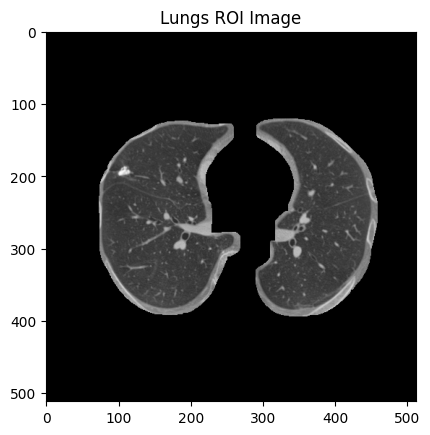

Image shape: (512, 512)
Minimum pixel value: 0
Maximum pixel value: 220
Data type: uint8


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/ProcessedData/lungs_roi/lungs_9_0_127_0.npy"
image = np.load(image_path)

# Display the image
plt.imshow(image, cmap='gray')
plt.title("Lungs ROI Image")
plt.show()

# Print information about the image
print("Image shape:", image.shape)
print("Minimum pixel value:", np.min(image))
print("Maximum pixel value:", np.max(image))
print("Data type:", image.dtype)


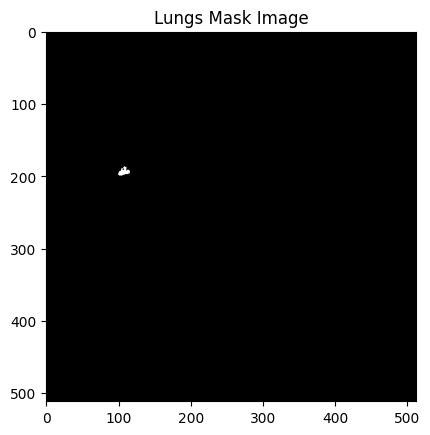

Image shape: (512, 512)
Minimum pixel value: 0
Maximum pixel value: 255
Data type: uint8


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/ProcessedData/nodule_mask/masks_9_0_127_0.npy"
image = np.load(image_path)

# Display the image
plt.imshow(image, cmap='gray')
plt.title("Lungs Mask Image")
plt.show()

# Print information about the image
print("Image shape:", image.shape)
print("Minimum pixel value:", np.min(image))
print("Maximum pixel value:", np.max(image))
print("Data type:", image.dtype)

# Loading Data For Preprocessing

In [ ]:
lung_names = os.listdir("/content/ProcessedData/lungs_roi/")
random.shuffle(lung_names)

In [ ]:
n = len(lung_names)
s = int(n*.8)
train_lung_names = lung_names[:s]
test_lung_names = lung_names[s:]
print(len(train_lung_names))
print(len(test_lung_names))

163
41


In [ ]:
trainX = []
trainY = []

for lname in tqdm(train_lung_names):
  mname = lname.replace("lungs","masks")
  lung = np.load("/content/ProcessedData/lungs_roi/"+lname)
  mask = np.load("/content/ProcessedData/nodule_mask/"+mname)
  trainX.append(lung)
  trainY.append(mask)

trainX = np.array(trainX, dtype=np.uint8)
trainY = np.array(trainY, dtype=np.uint8)

np.save("trainX.npy", trainX)
np.save("trainY.npy", trainY)

  0%|          | 0/163 [00:00<?, ?it/s]

In [ ]:
testX = []
testY = []

for lname in tqdm(test_lung_names):
  mname = lname.replace("lungs","masks")
  lung = np.load("/content/ProcessedData/lungs_roi/"+lname)
  mask = np.load("/content/ProcessedData/nodule_mask/"+mname)
  testX.append(lung)
  testY.append(mask)

testX = np.array(testX, dtype=np.uint8)
testY = np.array(testY, dtype=np.uint8)

np.save("testX.npy", testX)
np.save("testY.npy", testY)

  0%|          | 0/41 [00:00<?, ?it/s]

In [ ]:
!cp trainX.npy /content/drive/MyDrive/Dataset/Lung_Segmentation/ProcessedData/trainX.npy
!cp trainY.npy /content/drive/MyDrive/Dataset/Lung_Segmentation/ProcessedData/trainY.npy

!cp testX.npy /content/drive/MyDrive/Dataset/Lung_Segmentation/ProcessedData/testX.npy
!cp testY.npy /content/drive/MyDrive/Dataset/Lung_Segmentation/ProcessedData/testY.npy

# U-net For Segmenting Lung Nodule

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

From Google Drive

In [ ]:
trainX = np.load("/content/drive/MyDrive/Dataset/Lung_Segmentation/ProcessedData/trainX.npy").astype(np.float32)
trainY = np.load("/content/drive/MyDrive/Dataset/Lung_Segmentation/ProcessedData/trainY.npy").astype(np.float32)
testX = np.load("/content/drive/MyDrive/Dataset/Lung_Segmentation/ProcessedData/testX.npy").astype(np.float32)
testY = np.load("/content/drive/MyDrive/Dataset/Lung_Segmentation/ProcessedData/testY.npy").astype(np.float32)

From Local Storage

In [ ]:
trainX = np.load("/content/trainX.npy").astype(np.float32)
trainY = np.load("/content/trainY.npy").astype(np.float32)
testX = np.load("/content/testX.npy").astype(np.float32)
testY = np.load("/content/testY.npy").astype(np.float32)

In [ ]:
trainX.shape

(163, 512, 512)

In [ ]:
trainX = (trainX-127.0)/127.0
testX = (testX-127.0)/127.0
trainY = (trainY>127).astype(np.float32)
testY = (testY>127).astype(np.float32)

In [ ]:
print(trainX.dtype)
print(trainY.dtype)
print(testX.dtype)
print(testY.dtype)

float32
float32
float32
float32


In [ ]:
trainX = np.reshape(trainX, (len(trainX), 512, 512, 1))
trainY = np.reshape(trainY, (len(trainY), 512, 512, 1))
testX = np.reshape(testX, (len(testX), 512, 512, 1))
testY = np.reshape(testY, (len(testY), 512, 512, 1))

print("trainX:",trainX.shape)
print("trainY:",trainY.shape)
print("testX:",testX.shape)
print("testY:",testY.shape)

trainX: (163, 512, 512, 1)
trainY: (163, 512, 512, 1)
testX: (41, 512, 512, 1)
testY: (41, 512, 512, 1)


In [ ]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [ ]:
def unet(input_size=(512,512,1)):
    inputs = Input(input_size)
    K.set_image_data_format('channels_last')

    conv1 = Conv2D(32, (3,3), activation="relu", padding="same")(inputs)
    conv1 = Conv2D(32, (3,3), activation="relu", padding="same")(conv1)
    pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
    conv2 = Conv2D(64, (3,3), activation="relu", padding="same")(pool1)
    conv2 = Conv2D(64, (3,3), activation="relu", padding="same")(conv2)
    pool2 = MaxPooling2D(pool_size=(2,2))(conv2)
    conv3 = Conv2D(128, (3,3), activation="relu", padding="same")(pool2)
    conv3 = Conv2D(128, (3,3), activation="relu", padding="same")(conv3)
    pool3 = MaxPooling2D(pool_size=(2,2))(conv3)
    conv4 = Conv2D(256, (3,3), activation="relu", padding="same")(pool3)
    conv4 = Conv2D(256, (3,3), activation="relu", padding="same")(conv4)
    pool4 = MaxPooling2D(pool_size=(2,2))(conv4)
    conv5 = Conv2D(512, (3,3), activation="relu", padding="same")(pool4)
    conv5 = Conv2D(512, (3,3), activation="relu", padding="same")(conv5)
    up6 = concatenate([Conv2DTranspose(256, kernel_size=(2,2), strides=(2,2), padding="same")(conv5), conv4], axis=-1)
    conv6 = Conv2D(256, (3,3), activation="relu", padding="same")(up6)
    conv6 = Conv2D(256, (3,3), activation="relu", padding="same")(conv6)
    up7 = concatenate([Conv2DTranspose(128, kernel_size=(2,2), strides=(2,2), padding="same")(conv6), conv3], axis=-1)
    conv7 = Conv2D(128, (3,3), activation="relu", padding="same")(up7)
    conv7 = Conv2D(128, (3,3), activation="relu", padding="same")(conv7)
    up8 = concatenate([Conv2DTranspose(64, kernel_size=(2,2), strides=(2,2), padding="same")(conv7), conv2], axis=-1)
    conv8 = Conv2D(64, (3,3), activation="relu", padding="same")(up8)
    conv8 = Conv2D(64, (3,3), activation="relu", padding="same")(conv8)
    up9 = concatenate([Conv2DTranspose(32, kernel_size=(2,2), strides=(2,2), padding="same")(conv8), conv1], axis=-1)
    conv9 = Conv2D(32, (3,3), activation="relu", padding="same")(up9)
    conv9 = Conv2D(32, (3,3), activation="relu", padding="same")(conv9)
    conv10 = Conv2D(1, (1,1), activation="sigmoid")(conv9)

    return Model(inputs=[inputs], outputs=[conv10])

In [ ]:
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, LearningRateScheduler, ReduceLROnPlateau

training_dir = "/content/training_data/"
os.makedirs(training_dir, exist_ok=True)

checkpoint = ModelCheckpoint(os.path.join(training_dir, "checkpoint-{epoch:03d}-{val_dice_coef:.3f}.hdf5"), monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.7,
                                   patience=2,
                                   verbose=1, mode='min', min_delta=0.0001, cooldown=2, min_lr=1e-6)
early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=10)
log_csv = CSVLogger(os.path.join(training_dir, "training_logs.csv"), separator=',', append=False)

CALLBACKS = [checkpoint, early, log_csv, reduceLROnPlat]

In [ ]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

In [ ]:
#with strategy.scope():   need to have activated tpu for using strategy function otherwise will run on either cpu or gpu
model = unet(input_size=(512,512,1))
model.compile(optimizer=Adam(learning_rate=2e-4),
            loss=[dice_coef_loss],
            metrics = [dice_coef, 'binary_accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 32)         320       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 512, 512, 32)         9248      ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 256, 256, 32)         0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [ ]:
history = model.fit(x = trainX,
                    y = trainY,
                    batch_size = 16,
                    epochs = 200,
                    validation_data =(testX,testY),
                    callbacks=CALLBACKS
                  )

Epoch 1/200
6/6 [==============================] - ETA: 0s - loss: -0.0019 - dice_coef: 0.1059 - binary_accuracy: 0.9774
Epoch 1: val_loss improved from inf to -0.00195, saving model to checkpoint-001-0.189.hdf5
6/6 [==============================] - 60s 7s/step - loss: -0.0019 - dice_coef: 0.1059 - binary_accuracy: 0.9774 - val_loss: -0.0020 - val_dice_coef: 0.1892 - val_binary_accuracy: 0.9832 - lr: 2.0000e-04
Epoch 2/200
6/6 [==============================] - ETA: 0s - loss: -0.0020 - dice_coef: 0.1060 - binary_accuracy: 0.9839
Epoch 2: val_loss improved from -0.00195 to -0.00208, saving model to checkpoint-002-0.189.hdf5
6/6 [==============================] - 3s 511ms/step - loss: -0.0020 - dice_coef: 0.1060 - binary_accuracy: 0.9839 - val_loss: -0.0021 - val_dice_coef: 0.1893 - val_binary_accuracy: 0.9860 - lr: 2.0000e-04
Epoch 3/200
6/6 [==============================] - ETA: 0s - loss: -0.0022 - dice_coef: 0.1062 - binary_accuracy: 0.9862
Epoch 3: val_loss improved from -0.00208

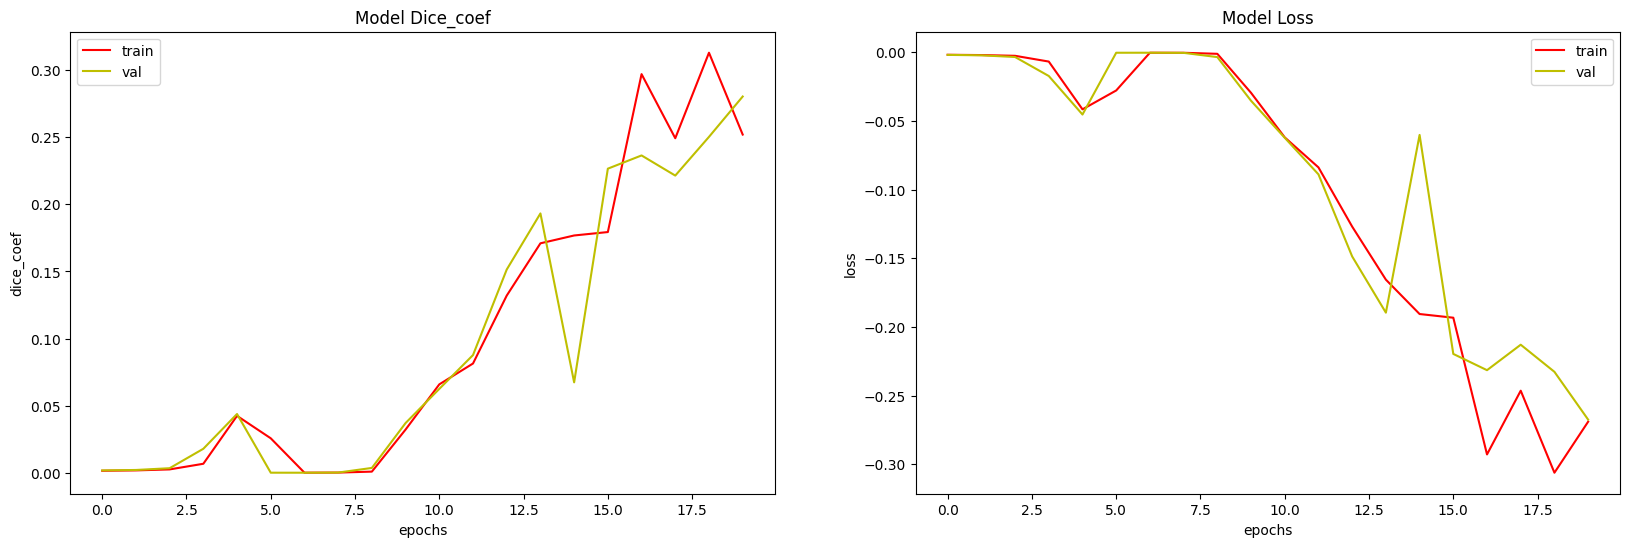

In [ ]:
plt.figure(figsize=(20,6))
for i, met in enumerate(['dice_coef', 'loss']):
  plt.subplot(1,2,i+1)
  plt.plot(history.history[met], color="r")
  plt.plot(history.history["val_"+met], color="b")
  plt.title('Model '+met.capitalize())
  plt.xlabel('epochs')
  plt.ylabel(met)
  plt.legend(['train', 'val'])

In [ ]:
import pickle
with open('LC_UNet_trainHistory', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)
# To load history
        history = pickle.load(open('/content/LC_UNet_trainHistory', "rb"))

In [ ]:
model.save("LC2_v2_UNet.h5")

In [ ]:
model.evaluate(testX, testY)


2/2 [==============================] - 1s 120ms/step - loss: -0.6649 - dice_coef: 0.6908 - binary_accuracy: 0.9996


[-0.6649478077888489, 0.6908313035964966, 0.9995881915092468]

In [ ]:
!mv /content/checkpoint-090-0.691.hdf5 /content/drive/MyDrive/Dataset/Lung_Segmentation

In [ ]:
with strategy.scope():
  model2 = unet(input_size=(512,512,1))
  model2.load_weights("/content/drive/MyDrive/Dataset/Lung_Segmentation/checkpoint-090-0.691.hdf5")

  model2.compile(optimizer=Adam(learning_rate=2e-4),
                loss=[dice_coef_loss],
                metrics = [dice_coef, 'binary_accuracy'])

model2.evaluate(testX, testY)

2/2 [==============================] - 20s 9s/step - loss: -0.6655 - dice_coef: 0.6913 - binary_accuracy: 0.9996


[-0.6655162572860718, 0.6912553906440735, 0.9995869994163513]

In [ ]:
model2.save("LC2_v2_UNet_best_Model_checkpoint.h5")


1/1 [==============================] - 1s 978ms/step


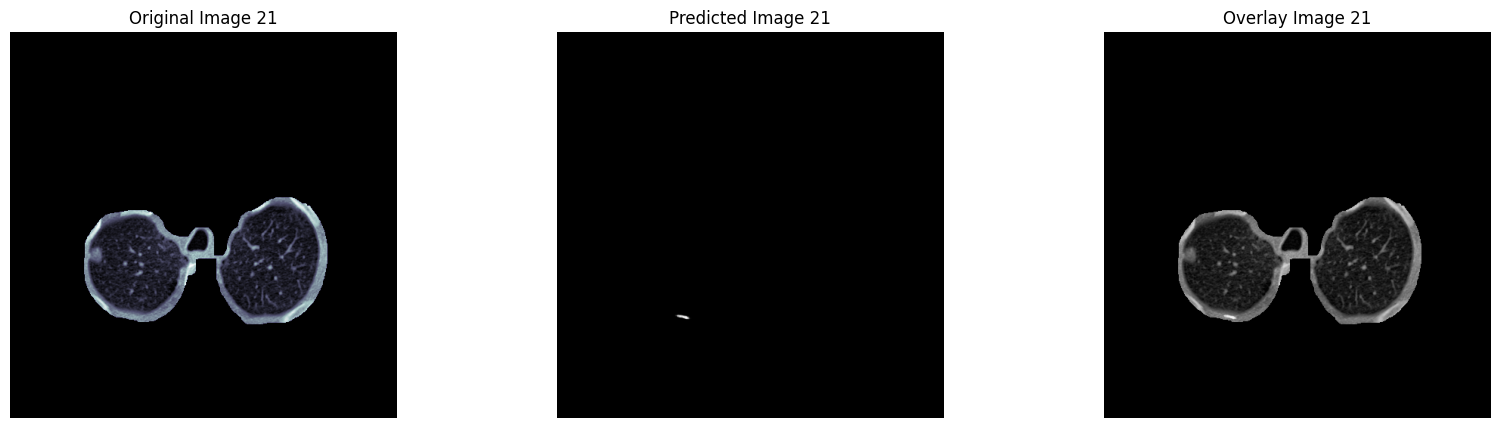

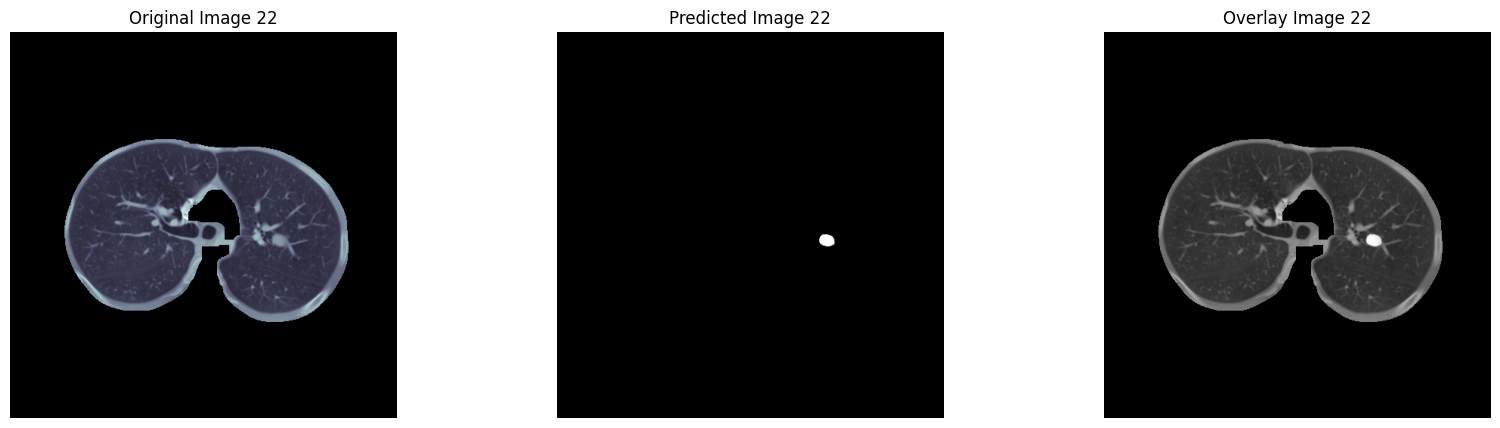

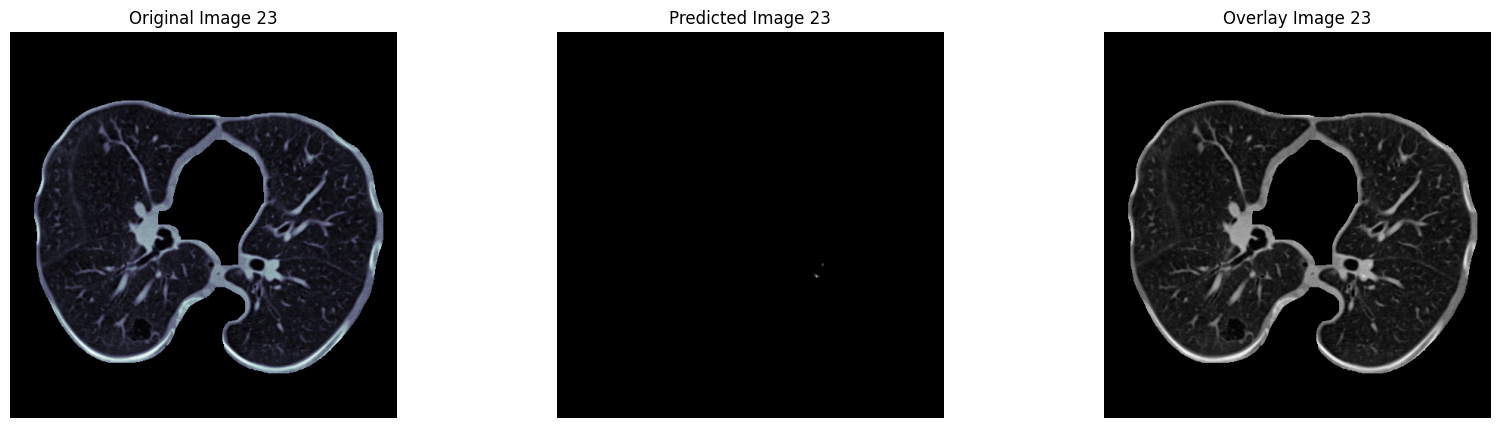

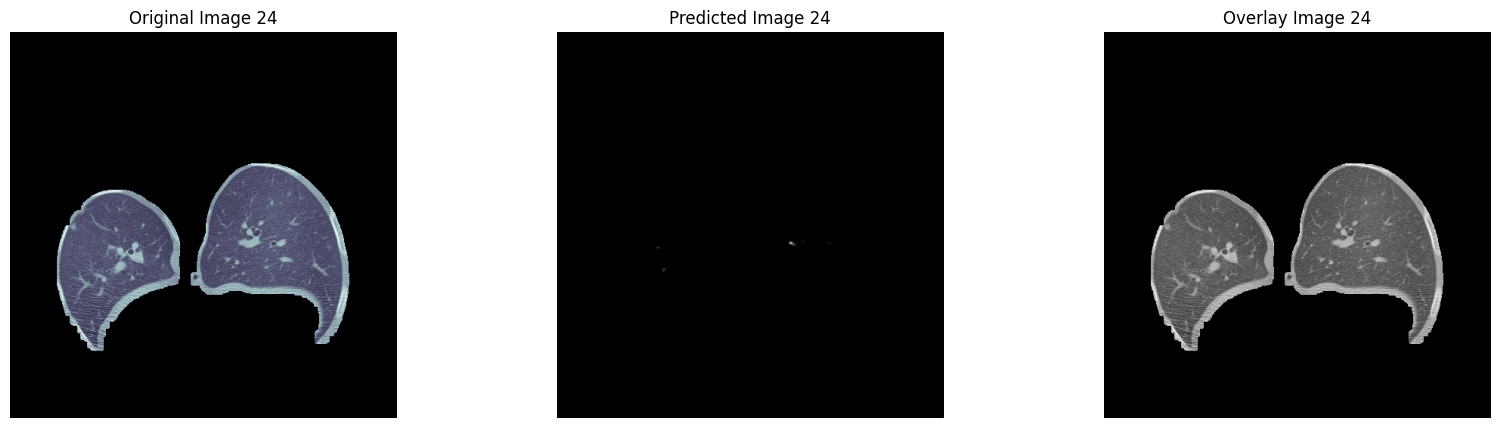

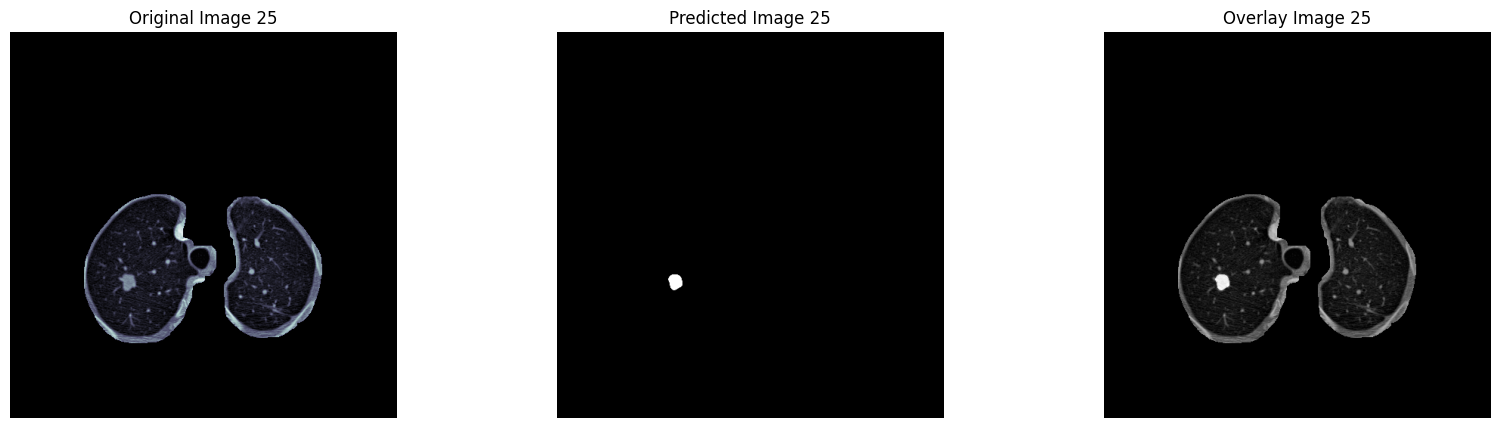

In [ ]:
j = 1
for i in range(21, 26):
    test = np.squeeze(testX)[i]
    t_p = model.predict(np.reshape(test, (1, 512, 512, 1)))

    plt.figure(figsize=(20, 300))

    # Original Image Subplot
    plt.subplot(50, 3, j)
    plt.imshow(np.squeeze(test), cmap="bone")
    plt.title(f'Original Image {i}')
    plt.gca().set_axis_off()  # Turn off axis

    # Predicted Image Subplot
    plt.subplot(50, 3, j + 1)
    plt.imshow(np.squeeze(t_p), cmap="gray")
    plt.title(f'Predicted Image {i}')
    plt.gca().set_axis_off()  # Turn off axis

    # Overlay of Original and Predicted Image Subplot
    plt.subplot(50, 3, j + 2)
    plt.imshow(cv2.addWeighted(np.squeeze(test), 0.5, np.squeeze(t_p), 0.5, 0), cmap="gray")
    plt.title(f'Overlay Image {i}')
    plt.gca().set_axis_off()  # Turn off axis

    # Increment j by 3 for the next set of subplots
    j += 3

plt.show()


1/1 [==============================] - 2s 2s/step


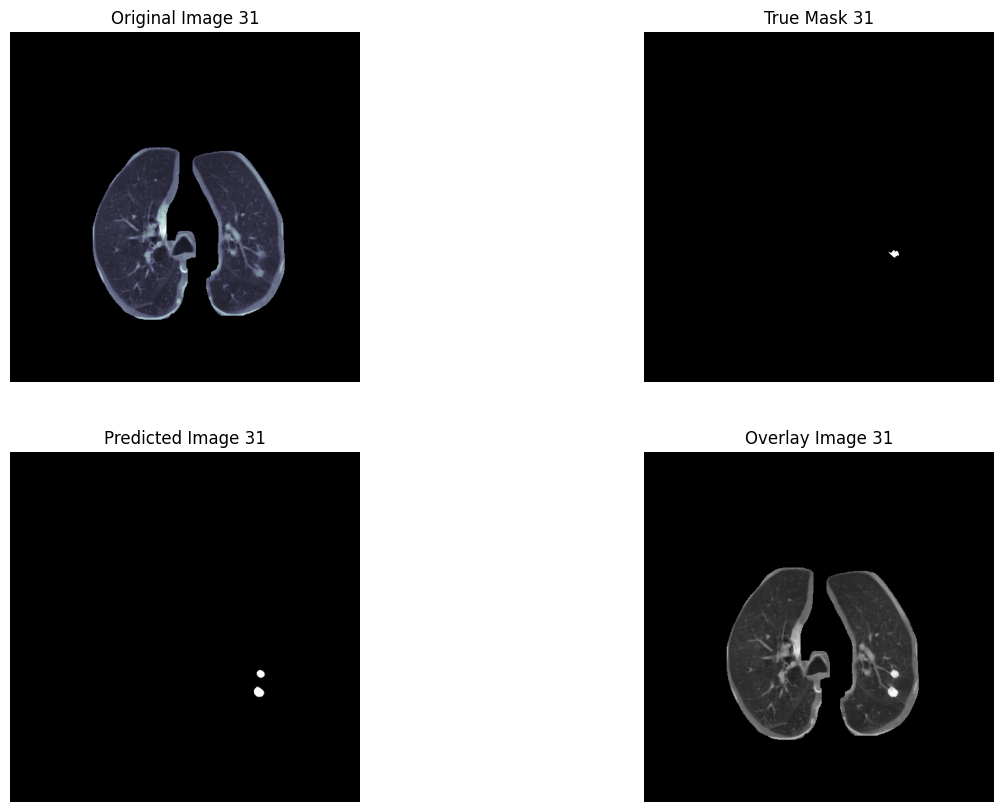

1/1 [==============================] - 1s 1s/step


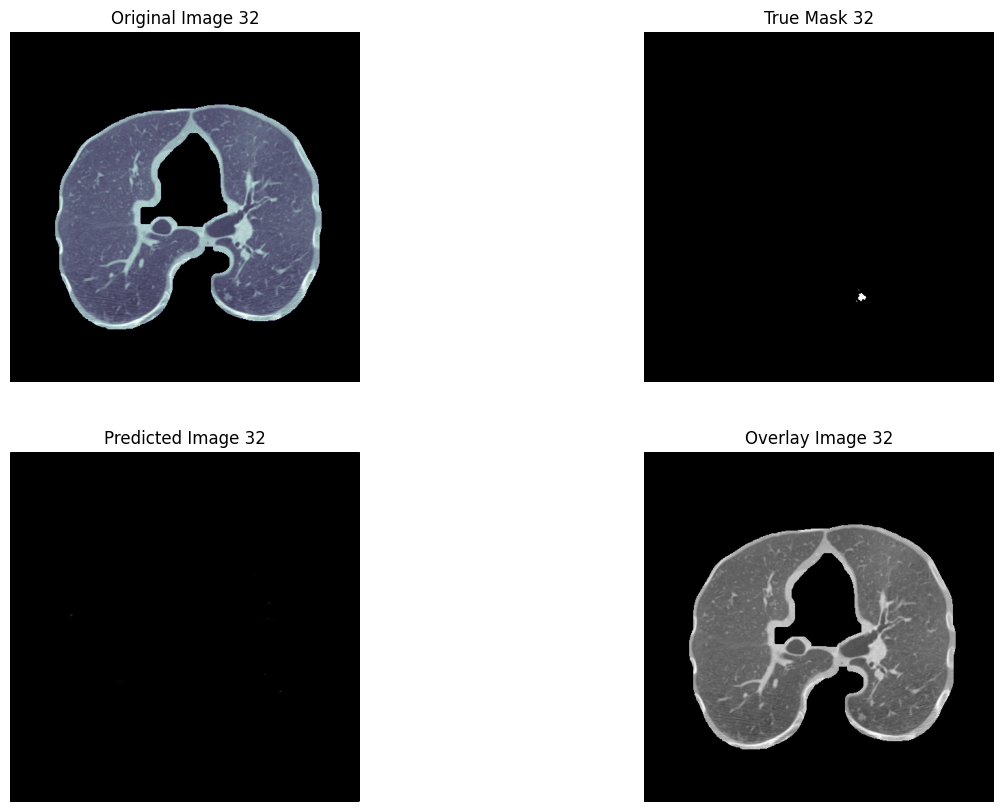

1/1 [==============================] - 1s 977ms/step


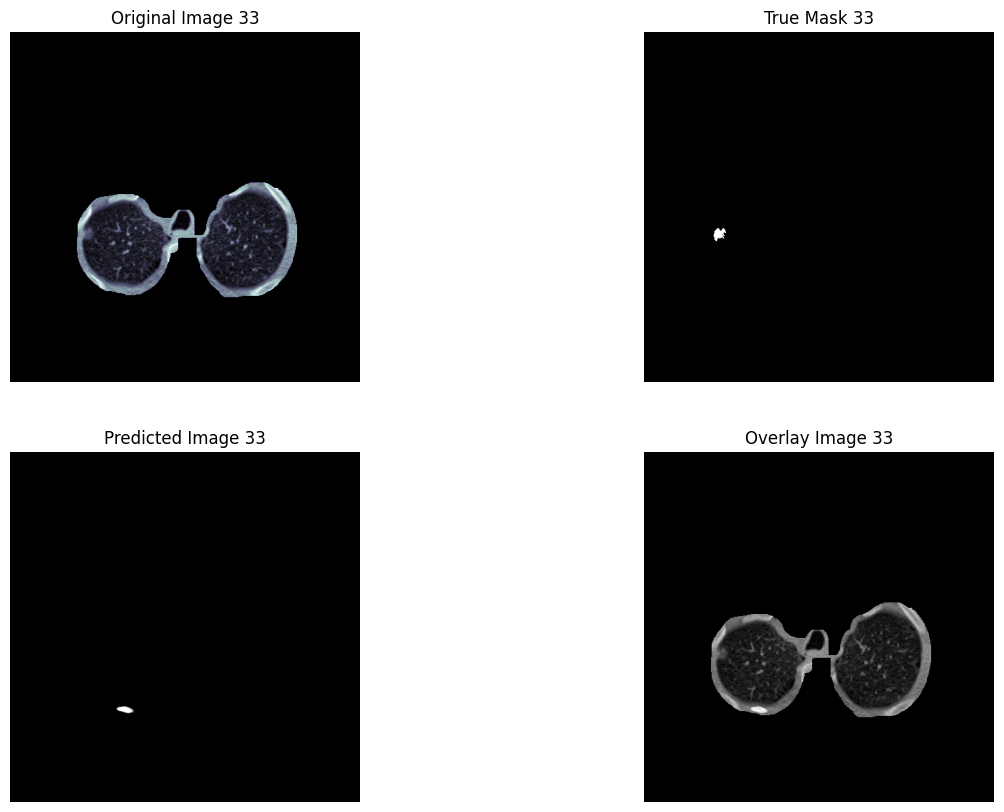

1/1 [==============================] - 1s 984ms/step


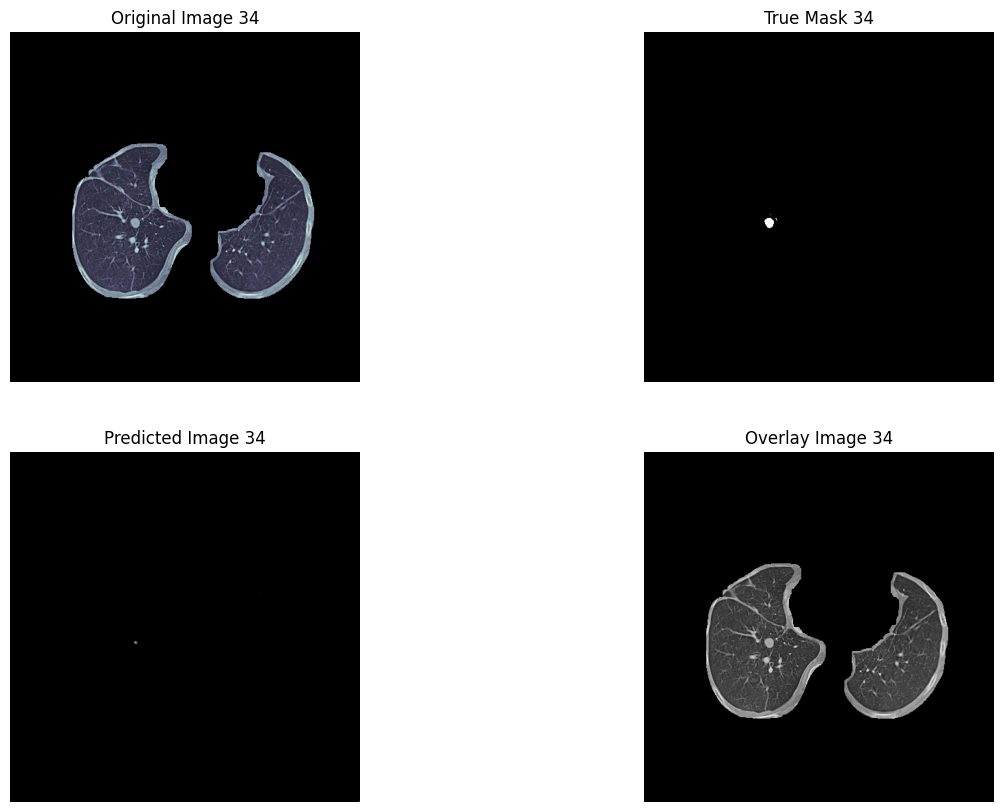

1/1 [==============================] - 1s 960ms/step


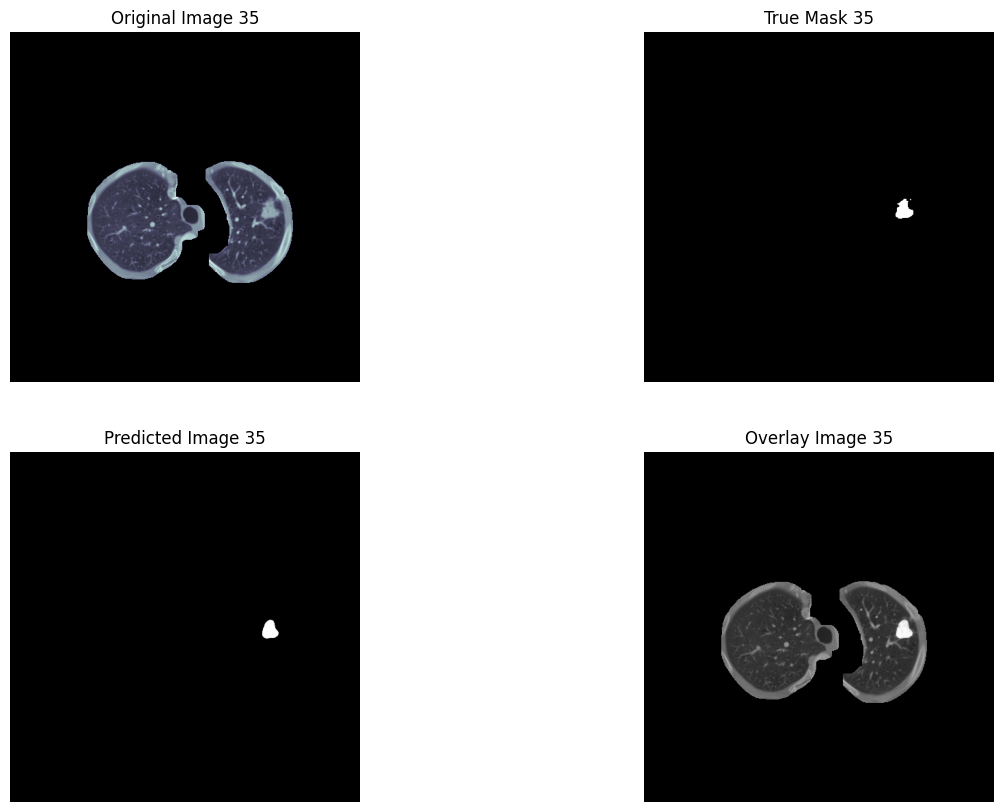

1/1 [==============================] - 1s 986ms/step


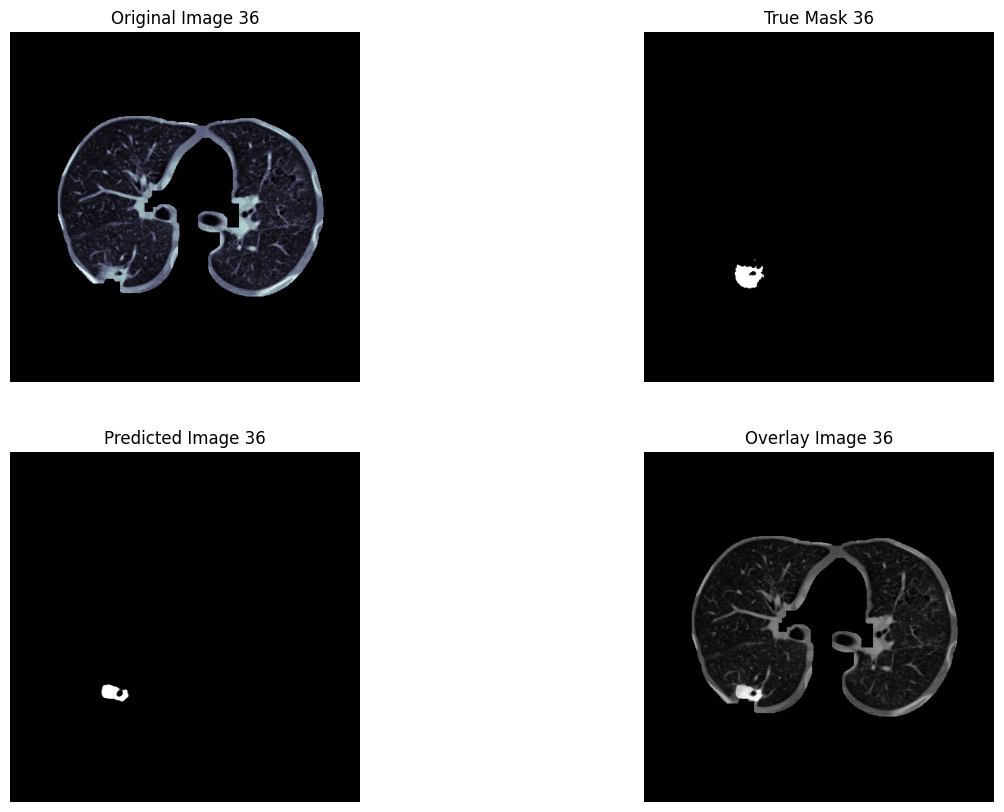

1/1 [==============================] - 2s 2s/step


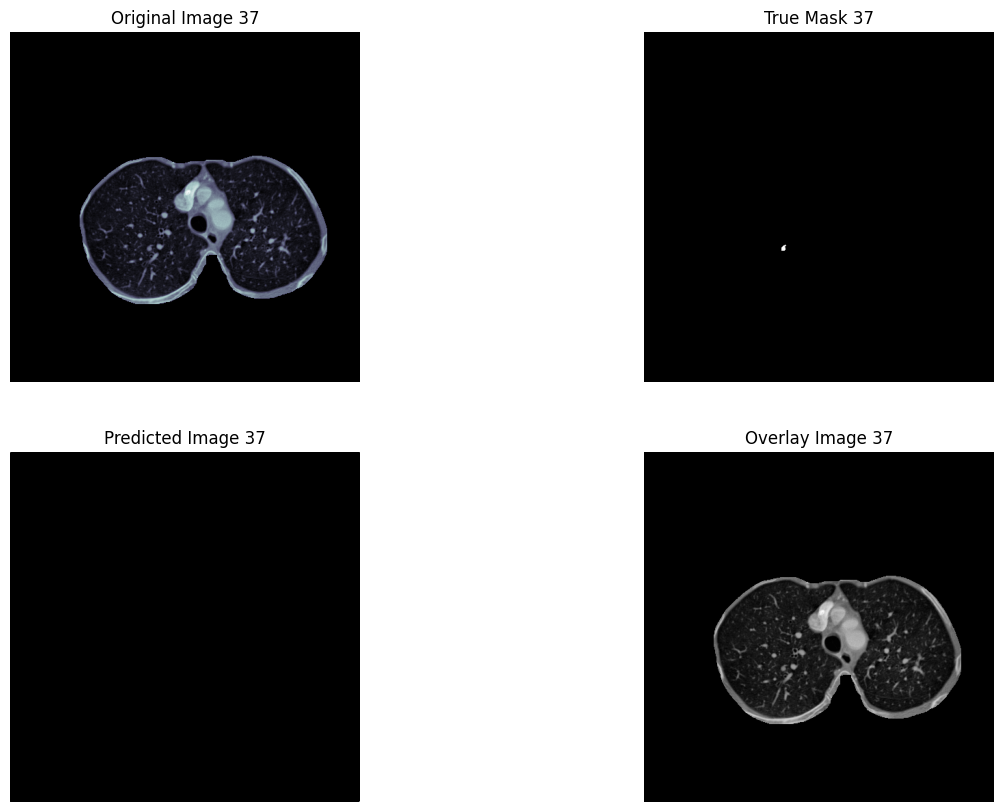

1/1 [==============================] - 1s 984ms/step


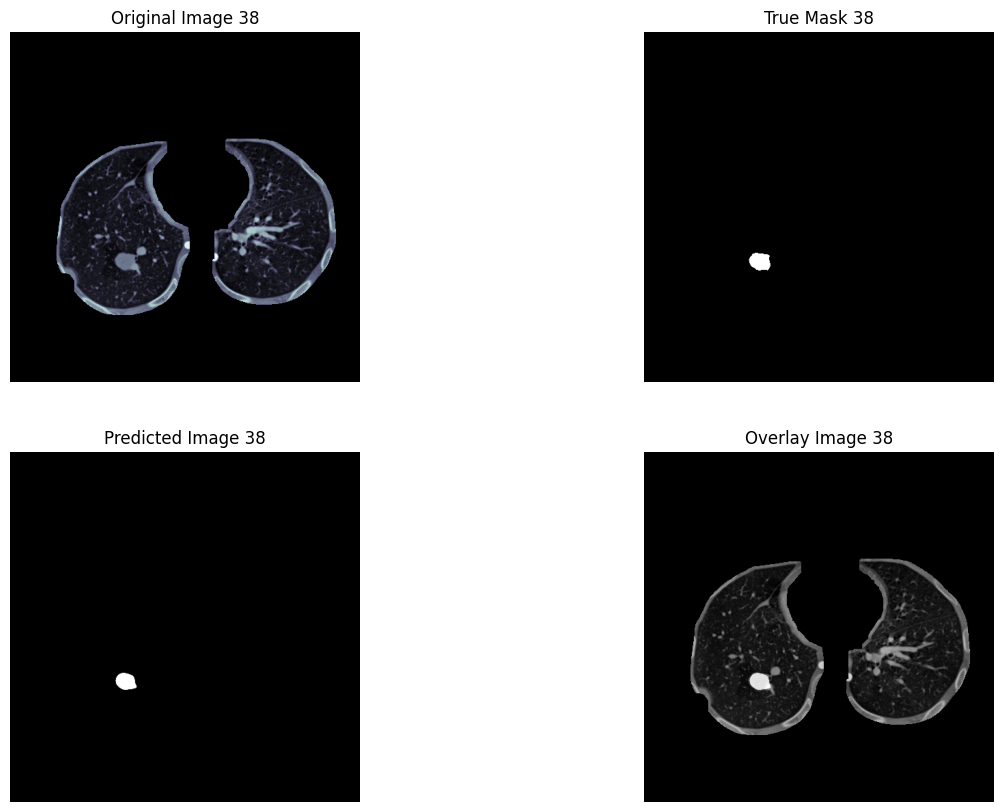

1/1 [==============================] - 1s 1s/step


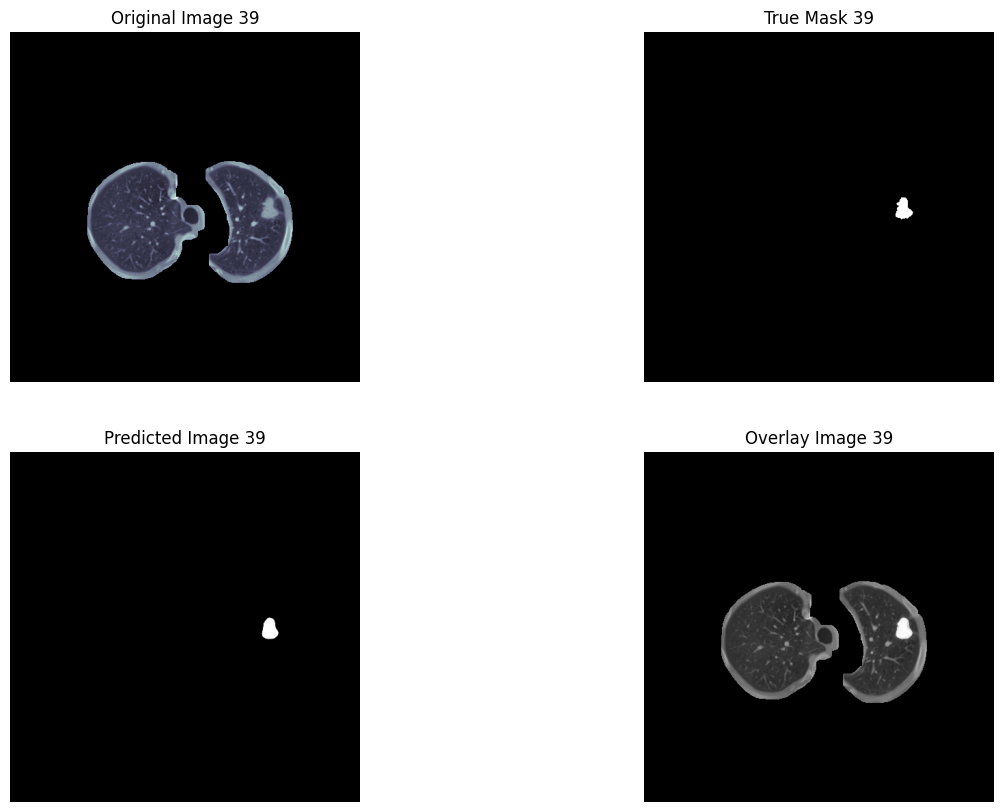

1/1 [==============================] - 1s 1s/step


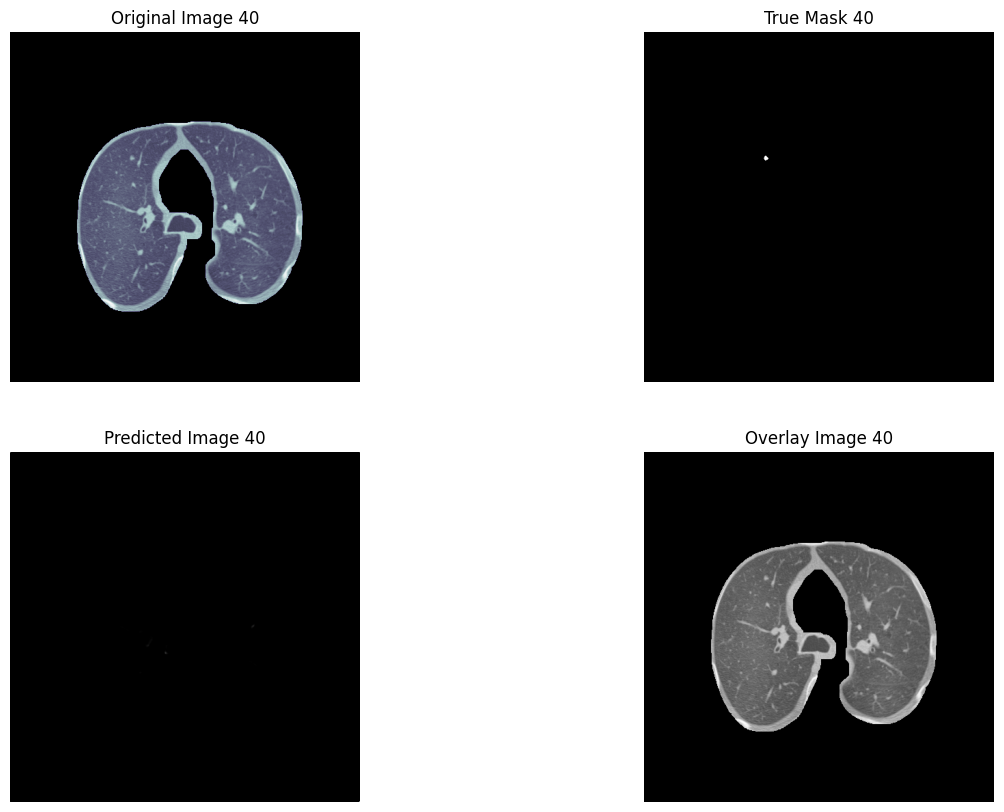

In [ ]:
for i in range(31, 41):
    test = np.squeeze(testX)[i]
    true_mask = np.squeeze(testY)[i]
    t_p = model.predict(np.reshape(test, (1, 512, 512, 1)))

    plt.figure(figsize=(15, 10))

    # Original Image Subplot
    plt.subplot(2, 2, 1)
    plt.imshow(np.squeeze(test), cmap="bone")
    plt.title(f'Original Image {i}')
    plt.gca().set_axis_off()  # Turn off axis

    # True Mask Subplot
    plt.subplot(2, 2, 2)
    plt.imshow(np.squeeze(true_mask), cmap="gray")
    plt.title(f'True Mask {i}')
    plt.gca().set_axis_off()  # Turn off axis

    # Predicted Image Subplot
    plt.subplot(2, 2, 3)
    plt.imshow(np.squeeze(t_p), cmap="gray")
    plt.title(f'Predicted Image {i}')
    plt.gca().set_axis_off()  # Turn off axis

    # Overlay of Original and Predicted Image Subplot
    plt.subplot(2, 2, 4)
    plt.imshow(cv2.addWeighted(np.squeeze(test), 0.5, np.squeeze(t_p), 0.5, 0), cmap="gray")
    plt.title(f'Overlay Image {i}')
    plt.gca().set_axis_off()  # Turn off axis

    plt.show()  # Display the current set of subplots

    # Ask for user input to proceed to the next image
    #input("Press Enter to proceed to the next image...")

# End of loop


In [ ]:
#!cp LC2_v2_UNet.h5 drive/MyDrive/Datasets/lc2/v2/Training_Logs/1st_Trial/LC2_v2_UNet.h5
!cp /content/LC_UNet_trainHistory /content/drive/MyDrive/Dataset/Lung_Segmentation/LC2_UNet_trainHistory
#!cp LC2_v2_UNet_best_Model_checkpoint.h5 drive/MyDrive/Datasets/lc2/v2/Training_Logs/1st_Trial/LC2_UNet_best_Model_checkpoint.h5


# Classification Using DenseNet

In [ ]:
#delete all the sub dirs of a dir
#!rm -r /content/Complete_Data/*

In [ ]:
import os
import zipfile
from tqdm.auto import tqdm

zip_dir = "/content"

output_dir = "/content/Complete_Data"

os.makedirs(output_dir, exist_ok=True)

# Iterate over each zip file in the directory
zip_files = [file for file in os.listdir(zip_dir) if file.endswith(".zip")]
for zip_file in zip_files:
    zip_path = os.path.join(zip_dir, zip_file)

    extract_folder_name = os.path.splitext(zip_file)[0]
    print("Processing",extract_folder_name)

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        file_list = zip_ref.namelist()
        total_files = len(file_list)

    with tqdm(total=total_files, desc="Extracting", unit="file") as pbar:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            for file in file_list:
                zip_ref.extract(file, output_dir)
                pbar.update(1)

    # Remove the zip file after extraction
    os.remove(zip_path)

print("Extraction complete.")


Processing subset9


Extracting:   0%|          | 0/176 [00:00<?, ?file/s]

Processing subset8


Extracting:   0%|          | 0/176 [00:00<?, ?file/s]

Extraction complete.


## ROI for Classification

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
import SimpleITK as stk
from glob import glob
from tqdm.auto import tqdm

In [ ]:
root = "/content/Complete_Data/"
target_root = "/content/FPRProcessedData/"
os.makedirs(target_root, exist_ok=True)

subset = 9    # Ran for 0...9
file_list = glob(root+f"subset{subset}/*.mhd")
print("Files Count:",len(file_list))

Files Count: 88


In [ ]:
candidates_df = pd.read_csv("/content/candidates.csv")
candidates_df.head()

In [ ]:
print("Total Candidates:",len(candidates_df))
print("Positives:",candidates_df['class'].sum())

Total Candidates: 551065
Positives: 1351


In [ ]:
candidates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551065 entries, 0 to 551064
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   seriesuid  551065 non-null  object 
 1   coordX     551065 non-null  float64
 2   coordY     551065 non-null  float64
 3   coordZ     551065 non-null  float64
 4   class      551065 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 21.0+ MB


In [ ]:
def get_filename(file_list, file):
    for f in file_list:
        if file in f:
            return f

def load_mhd(file):
    mhdimage = stk.ReadImage(file)
    ct_scan = stk.GetArrayFromImage(mhdimage)
    origin = np.array(list(mhdimage.GetOrigin()))
    space = np.array(list(mhdimage.GetSpacing()))
    return ct_scan, origin, space

candidates_df["filename"] = candidates_df["seriesuid"].map(lambda file: get_filename(file_list, file))
candidates_df = candidates_df.dropna()
print(len(candidates_df))

candidates_df.head()

57100


,seriesuid,coordX,coordY,coordZ,class,filename
6453,1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408...,-32.557644,-22.198961,-215.086480,0,/content/Complete_Data/subset9/1.3.6.1.4.1.145...
6454,1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408...,92.870000,16.110000,-115.810000,0,/content/Complete_Data/subset9/1.3.6.1.4.1.145...
6455,1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408...,123.491069,2.980240,-202.344555,0,/content/Complete_Data/subset9/1.3.6.1.4.1.145...
6456,1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408...,109.618624,11.210602,-127.961579,0,/content/Complete_Data/subset9/1.3.6.1.4.1.145...
6457,1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408...,59.014300,15.181310,-120.080000,0,/content/Complete_Data/subset9/1.3.6.1.4.1.145...


In [ ]:
nod_dir = "/content/FPRProcessedData/nodule"
non_nod_dir = "/content/FPRProcessedData/non-nodule-initial"
os.makedirs(nod_dir, exist_ok=True)
os.makedirs(non_nod_dir, exist_ok=True)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
for i,file in tqdm(enumerate(np.unique(candidates_df['filename'].values)), desc="Processing", unit="file", total=len(np.unique(candidates_df['filename'].values))):
    candidates = candidates_df[candidates_df["filename"]==file]
    ct, origin, space = load_mhd(file)
    num_z, height, width = ct.shape
    ct_norm = cv2.normalize(ct, None, 0, 255, cv2.NORM_MINMAX)
    for idx, row in candidates.iterrows():
        node_x = int(row["coordX"])
        node_y = int(row["coordY"])
        node_z = int(row["coordZ"])
        c = int(row["class"])

        center = np.array([node_x, node_y, node_z])
        v_center = np.rint((center-origin)/space)

        img_norm = ct_norm[int(v_center[2]),:,:]
        img_norm = cv2.resize(img_norm, (512,512))
        img_norm_improved = clahe.apply(img_norm.astype(np.uint8))

        x=abs(int(v_center[0]))
        y=abs(int(v_center[1]))
        box = img_norm_improved[max(0,y-25):min(y+25,512),max(0,x-25):min(x+25,512)]
        if box.shape != (50,50):
            box = cv2.resize(box, (50,50))

        if c:
            cv2.imwrite(os.path.join(target_root+"nodule/", f"candidate_{subset}_{c}_{idx}.jpg"),box)
            cv2.imwrite(os.path.join(target_root+"nodule/", f"candidate_{subset}_{c}_{idx}_1.jpg"),cv2.rotate(box,cv2.ROTATE_90_CLOCKWISE))
            cv2.imwrite(os.path.join(target_root+"nodule/", f"candidate_{subset}_{c}_{idx}_2.jpg"),cv2.rotate(box, cv2.ROTATE_90_COUNTERCLOCKWISE))
            cv2.imwrite(os.path.join(target_root+"nodule/", f"candidate_{subset}_{c}_{idx}_3.jpg"),cv2.rotate(box, cv2.ROTATE_180))
            cv2.imwrite(os.path.join(target_root+"nodule/", f"candidate_{subset}_{c}_{idx}_4.jpg"),cv2.flip(box, 1))
        else:
            cv2.imwrite(os.path.join(target_root+"non-nodule-initial/", f"candidate_{subset}_{c}_{idx}.jpg"),box)
print("Completed")


Processing:   0%|          | 0/88 [00:00<?, ?file/s]

Completed


In [ ]:
len(glob(target_root+"non-nodule-initial/*.jpg"))

549714

In [ ]:
import zipfile
import os

def zip_dir(dir_path, zip_path):
    zip_file = zipfile.ZipFile(zip_path, 'w')
    for root, dirs, files in os.walk(dir_path):
        for file in files:
            zip_file.write(os.path.join(root, file))
    zip_file.close()

zip_dir("/content/FPRProcessedData", "/content/FPRProcessedData.zip")


In [ ]:
!cp /content/FPRProcessedData.zip -d /content/drive/MyDrive/Dataset/Lung_Segmentation/

## Dataset Creation

In [ ]:
import random
import os
import shutil
from tqdm.auto import tqdm


In [ ]:
root = "/content/ProcessedData/non-nodule-initial/"
target = "/content/ProcessedData/non-nodule/"
os.makedirs(target, exist_ok=True)


In [ ]:
filelist = os.listdir(root)
len(filelist)

549714

In [ ]:
random.shuffle(filelist)
filelist[:10]

['candidate_9_0_504120.jpg',
 'candidate_7_0_384730.jpg',
 'candidate_4_0_2339.jpg',
 'candidate_7_0_242423.jpg',
 'candidate_4_0_190640.jpg',
 'candidate_8_0_290815.jpg',
 'candidate_0_0_518795.jpg',
 'candidate_1_0_37296.jpg',
 'candidate_0_0_342678.jpg',
 'candidate_2_0_169408.jpg']

In [ ]:
finalfiles = filelist[:10000]
for file in tqdm(finalfiles, total=10000):
    s = root+file
    d = target+file
    shutil.copy(s,d)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
#Creating folders for storing train & test data
os.makedirs("Dataset/train/nodule", exist_ok=True)
os.makedirs("Dataset/train/non-nodule", exist_ok=True)
os.makedirs("Dataset/test/nodule", exist_ok=True)
os.makedirs("Dataset/test/non-nodule", exist_ok=True)

In [ ]:
nodule_files = os.listdir("ProcessedData/nodule/")
non_nodule_files = os.listdir("ProcessedData/non-nodule/")
random.shuffle(nodule_files)
random.shuffle(non_nodule_files)

In [ ]:
#Splitting data into train-test sets
n = len(nodule_files)
split = int(0.75*n)
for i in nodule_files[:split]:
    shutil.copy(f"ProcessedData/nodule/{i}", f"Dataset/train/nodule/{i}")
for i in nodule_files[split:]:
    shutil.copy(f"ProcessedData/nodule/{i}", f"Dataset/test/nodule/{i}")
n = len(non_nodule_files)
split = int(0.75*n)
for i in non_nodule_files[:split]:
    shutil.copy(f"ProcessedData/non-nodule/{i}", f"Dataset/train/non-nodule/{i}")
for i in non_nodule_files[split:]:
    shutil.copy(f"ProcessedData/non-nodule/{i}", f"Dataset/test/non-nodule/{i}")

In [ ]:
import zipfile
import os

def zip_dir(dir_path, zip_path):
    zip_file = zipfile.ZipFile(zip_path, 'w')
    for root, dirs, files in os.walk(dir_path):
        for file in files:
            zip_file.write(os.path.join(root, file))
    zip_file.close()

zip_dir("/content/Dataset", "/content/drive/MyDrive/Dataset/Lung_Segmentation/Classification_Dataset.zip")


## Model training

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!unzip -q /content/drive/MyDrive/Dataset/Lung_Segmentation/Classification_Dataset.zip
!mv /content/content/Dataset /content
!rm -r /content/content
!ls -1

Dataset
drive
sample_data


In [ ]:
print("Train Nodule:",len(os.listdir("/content/Dataset/train/nodule")))
print("Train Non-Nodule:",len(os.listdir("/content/Dataset/train/non-nodule")))
print("Test Nodule:",len(os.listdir("/content/Dataset/test/nodule")))
print("Test Non-Nodule:",len(os.listdir("/content/Dataset/test/non-nodule")))

Train Nodule: 5066
Train Non-Nodule: 7500
Test Nodule: 1689
Test Non-Nodule: 2500


In [ ]:
BATCH_SIZE = 48
generator = ImageDataGenerator(rescale=1./255)
trainData = generator.flow_from_directory(
    "/content/Dataset/train",
    target_size=(50,50),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='binary'
)
testData = generator.flow_from_directory(
    "/content/Dataset/test",
    target_size=(50,50),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='binary'
)

Found 12566 images belonging to 2 classes.
Found 4189 images belonging to 2 classes.


In [ ]:
print(trainData.class_indices)
print(testData.class_indices)

{'nodule': 0, 'non-nodule': 1}
{'nodule': 0, 'non-nodule': 1}


In [ ]:
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, LearningRateScheduler, ReduceLROnPlateau

training_dir = "/content/training_data/"
os.makedirs(training_dir, exist_ok=True)

checkpoint = ModelCheckpoint(os.path.join(training_dir, "checkpoint-{epoch:03d}-{val_accuracy:.3f}.hdf5"), monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.7,
                                   patience=2,
                                   verbose=1, mode='min', min_delta=0.0001, cooldown=2, min_lr=1e-6)
early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=10)
log_csv = CSVLogger(os.path.join(training_dir, "training_logs.csv"), separator=',', append=False)

CALLBACKS = [checkpoint, early, log_csv, reduceLROnPlat]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Reshape
from tensorflow.keras.applications import DenseNet121

# Define the input shape
input_shape = (50, 50, 1)

# Create a Sequential model
model = Sequential()

# Replicate the single channel to create a 3-channel image
model.add(Reshape((50, 50, 1), input_shape=input_shape))
model.add(Conv2D(3, kernel_size=(1, 1), activation='relu'))

# Add the DenseNet base model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(50, 50, 3))
model.add(base_model)

# Add additional layers for classification
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))  # Adjust the number of units for your classification task

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 50, 50, 1)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 3)         6         
                                                                 
 densenet121 (Functional)    (None, 1, 1, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                        

In [ ]:

history = model.fit(
      trainData,
      epochs=20,
      validation_data=testData,
      verbose=1,
      callbacks=[CALLBACKS]
)

Epoch 1/20
262/262 [==============================] - ETA: 0s - loss: 0.3541 - accuracy: 0.8485
Epoch 1: val_loss improved from inf to 0.44426, saving model to /content/training_data/checkpoint-001-0.850.hdf5
262/262 [==============================] - 110s 150ms/step - loss: 0.3541 - accuracy: 0.8485 - val_loss: 0.4443 - val_accuracy: 0.8498 - lr: 0.0010
Epoch 2/20
262/262 [==============================] - ETA: 0s - loss: 0.2216 - accuracy: 0.9134
Epoch 2: val_loss improved from 0.44426 to 0.35252, saving model to /content/training_data/checkpoint-002-0.868.hdf5
262/262 [==============================] - 29s 112ms/step - loss: 0.2216 - accuracy: 0.9134 - val_loss: 0.3525 - val_accuracy: 0.8677 - lr: 0.0010
Epoch 3/20
262/262 [==============================] - ETA: 0s - loss: 0.1748 - accuracy: 0.9351
Epoch 3: val_loss improved from 0.35252 to 0.27243, saving model to /content/training_data/checkpoint-003-0.904.hdf5
262/262 [==============================] - 29s 112ms/step - loss: 0.17

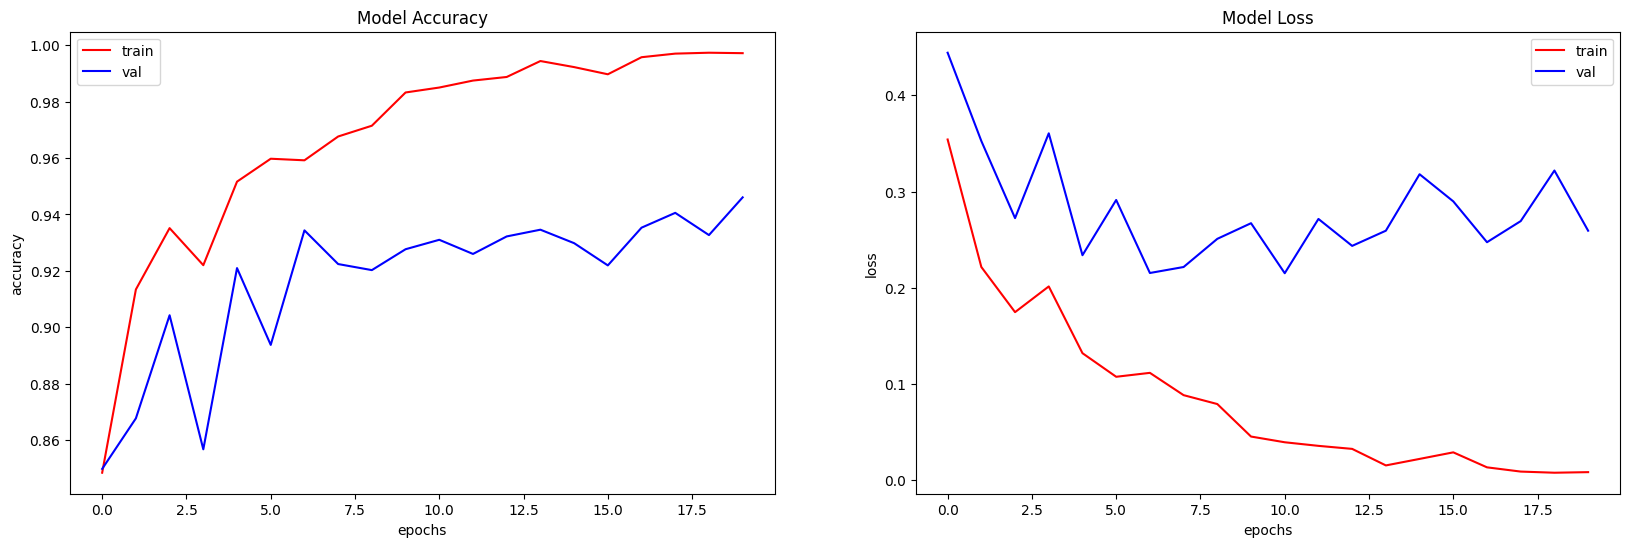

In [ ]:
plt.figure(figsize=(20,6))
for i, met in enumerate(['accuracy', 'loss']):
  plt.subplot(1,2,i+1)
  plt.plot(history.history[met], color="r")
  plt.plot(history.history["val_"+met], color="b")
  plt.title('Model '+met.capitalize())
  plt.xlabel('epochs')
  plt.ylabel(met)
  plt.legend(['train', 'val'])

In [ ]:
print("Val Accuracy:", history.history['val_accuracy'][-1])
print("Val Loss:", history.history['val_loss'][-1])


Val Accuracy: 0.946049153804779
Val Loss: 0.25936082005500793
